In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

## Data Preprocess

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(columns=["id","date"] , inplace=True)

In [9]:

features= df.loc[:, ~(df.columns.unique().isin(["price"]))]
target = df.loc[:,["price"]]

Text(0.5, 1.0, 'Sorted dataframe price vs index')

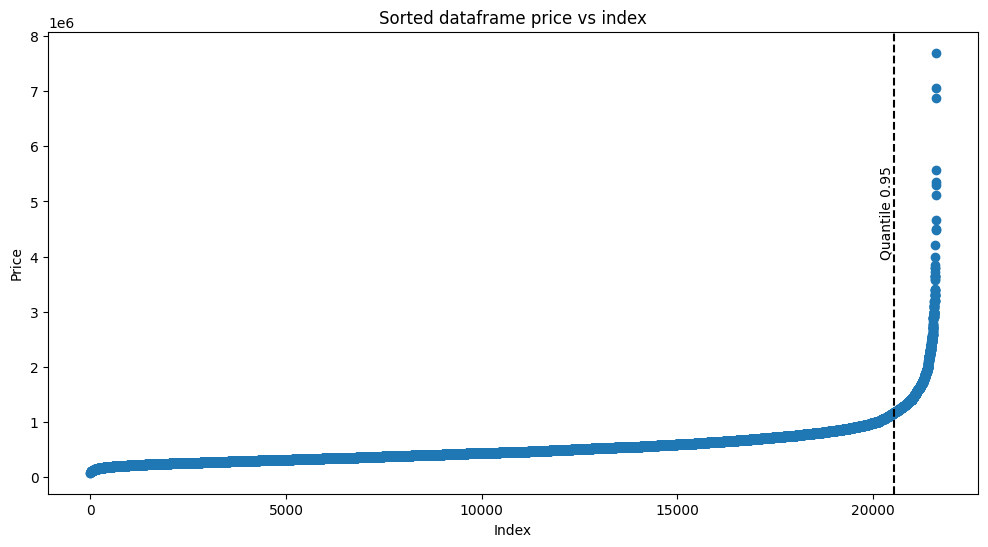

In [10]:
df_o = df.sort_values(by="price").reset_index()
q = df.price.quantile(0.95)

ind = df_o[df_o.price < q].idxmax().price

plt.figure(figsize=(12,6))
plt.axvline( ind ,linestyle='--',color='k')
plt.scatter(df_o.index , df_o.price)
plt.text(ind-350,4000000,'Quantile 0.95',rotation=90)
plt.ylabel("Price")
plt.xlabel("Index")
plt.title("Sorted dataframe price vs index")


## LABELING: IN OR OUT QUANTILE

In [11]:

df["label"] = df["price"]
 
df["label"] = df["label"].apply(lambda x: 1 if x >= q else 0)


In [12]:
df[df.price < q].label.sum()

0

In [13]:
df[df.price >= q].label.sum()

1081

## Classifier

In [14]:
features= df.loc[:, ~(df.columns.unique().isin(["price","label"]))]
target = df.loc[:,["label"]]

In [15]:
#Scaling the data

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test =train_test_split(features,target, test_size=0.2 , random_state=42)

scaler_clf=StandardScaler()

x_train= scaler_clf.fit_transform(x_train)
x_test= scaler_clf.transform(x_test)


In [16]:
import keras
from keras_tuner.tuners import RandomSearch


In [17]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten())
    
    for i in range(hp.Int("num_layers", 1, 20)):
        model.add(
            keras.layers.Dense(
                
                units=hp.Int(f"units_{i}", min_value=18, max_value=450, step=9),
                activation=hp.Choice("activation", ["relu","leaky_relu"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(keras.layers.Dropout(rate=0.25))
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=[keras.metrics.BinaryCrossentropy()],
    )
    return model

In [18]:
tuner = RandomSearch(
    hypermodel=build_model,
    objective="binary_crossentropy",
    max_trials=3,
    executions_per_trial=10,
    overwrite=True,
    directory="ANN_classifier_quantile",
    project_name="Regression_House_Price",
)

In [19]:
stop_early = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

In [20]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 18, 'max_value': 450, 'step': 9, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'leaky_relu'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [21]:
tuner.search(x_train,y_train ,epochs=500,validation_data=(x_test,y_test) , callbacks=[stop_early])

Trial 3 Complete [00h 10m 59s]
binary_crossentropy: 0.05103584453463554

Best binary_crossentropy So Far: 0.04392734244465828
Total elapsed time: 00h 24m 31s


In [22]:
tuner.results_summary()

Results summary
Results in ANN_classifier_quantile\Regression_House_Price
Showing 10 best trials
Objective(name="binary_crossentropy", direction="min")

Trial 1 summary
Hyperparameters:
num_layers: 16
units_0: 54
activation: relu
dropout: False
lr: 0.00010406284012562844
units_1: 234
units_2: 135
units_3: 261
units_4: 180
units_5: 261
units_6: 189
units_7: 81
units_8: 243
units_9: 36
units_10: 396
units_11: 18
units_12: 18
units_13: 18
units_14: 18
units_15: 18
Score: 0.04392734244465828

Trial 2 summary
Hyperparameters:
num_layers: 20
units_0: 144
activation: leaky_relu
dropout: True
lr: 0.00030969640670569564
units_1: 360
units_2: 162
units_3: 45
units_4: 324
units_5: 225
units_6: 189
units_7: 423
units_8: 243
units_9: 324
units_10: 387
units_11: 135
units_12: 315
units_13: 162
units_14: 162
units_15: 306
units_16: 18
units_17: 18
units_18: 18
units_19: 18
Score: 0.05103584453463554

Trial 0 summary
Hyperparameters:
num_layers: 11
units_0: 36
activation: relu
dropout: False
lr: 0.000

In [23]:
#Best model
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.summary()

C:\Users\PC1\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 70 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 18)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 54)             │         1,026 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 234)            │        12,870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 135)            │        31,725 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 261)            │        35,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 180)            │        47,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 261)            │        47,241 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 189)            │        49,518 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 81)             │        15,390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 243)            │        19,926 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 36)             │         8,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 396)            │        14,652 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 18)             │         7,146 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            19 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,321 (1.12 MB)

 Trainable params: 292,321 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
#Build and train the model with the best hyperparameters

best_hps = tuner.get_best_hyperparameters(5)

model_clf = build_model(best_hps[0])

model_clf.fit(x=x_train, y=y_train, validation_split=0.1 ,epochs=500)

Epoch 1/500
487/487 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - binary_crossentropy: 0.3382 - loss: 0.3382 - val_binary_crossentropy: 0.0874 - val_loss: 0.0874
Epoch 2/500
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - binary_crossentropy: 0.0763 - loss: 0.0763 - val_binary_crossentropy: 0.0742 - val_loss: 0.0742
Epoch 3/500
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - binary_crossentropy: 0.0710 - loss: 0.0710 - val_binary_crossentropy: 0.0703 - val_loss: 0.0703
Epoch 4/500
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - binary_crossentropy: 0.0646 - loss: 0.0646 - val_binary_crossentropy: 0.0669 - val_loss: 0.0669
Epoch 5/500
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - binary_crossentropy: 0.0548 - loss: 0.0548 - val_binary_crossentropy: 0.0635 - val_loss: 0.0635
Epoch 6/500
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - binary_crossentropy: 0.0510 - loss: 0.0510 - val_binary_crossentropy: 0.0645 - val_loss: 0.0645
Epoch 7/500
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - binary_crossentropy: 0.0484 - loss: 0.

### Ploting precision-recall curves for both labels 

In [25]:

predicted = [i[0] for i in  model_clf.predict(x_test)]

#Transform to 0 or 1 the predicted result given a treshold ,for example if the predicted result is up to 0.5 then it will by labeled as 1 otherwise will be 0)
def treshold_pred(treshold):
     predict = [1 if x > treshold else int(0) for x in predicted]
     return predict 


136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [26]:

x = np.linspace(0.50, 0.95, 10)

recall_precision = pd.DataFrame(columns=["treshold", "precision 0" , "recall 0" , "precision 1" , "recall 1"])


In [27]:

from sklearn.metrics import classification_report


for i in x.tolist():
    summary = classification_report(y_test , treshold_pred(i) , output_dict=True)
    recall_precision.loc[len(recall_precision)] = [i, summary["0"]["precision"] , summary["0"]["recall"] ,summary["1"]["precision"],summary["1"]["recall"]]


recall_precision = recall_precision.set_index("treshold")

Text(0.5, 1.0, 'Precision and recall labels 0 and 1')

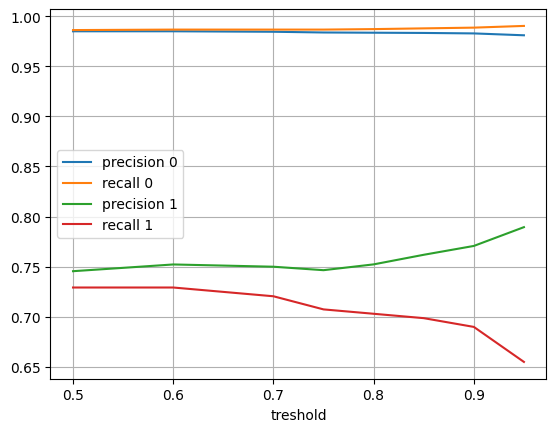

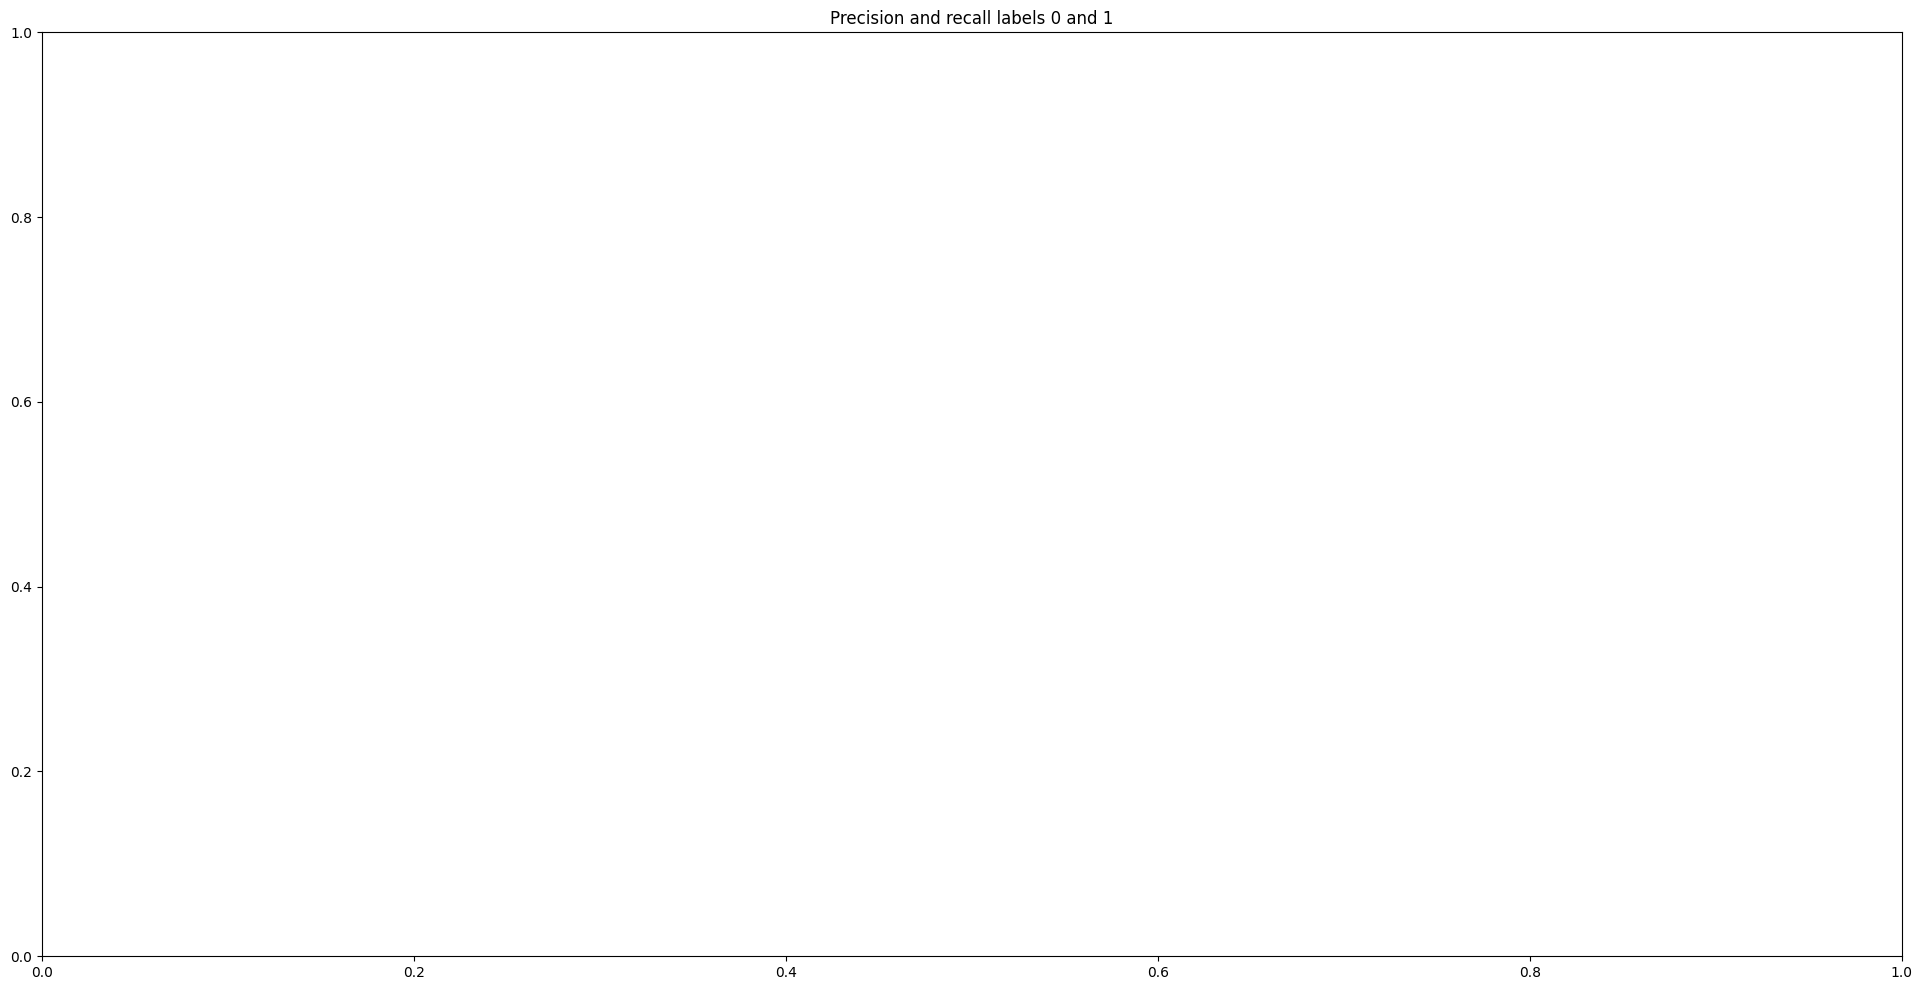

In [ ]:
recall_precision.plot()

plt.grid()
plt.title("Precision and recall labels 0 and 1")


## ANN regression for .95

In [29]:
features= df[df.label == 0].loc[:, ~(df.columns.unique().isin(["price","label"]))]
target = df[df.label == 0].loc[:,["price"]]

In [30]:

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test =train_test_split(features,target, test_size=0.2 , random_state=42)

scaler95=StandardScaler()

x_train= scaler95.fit_transform(x_train)
x_test= scaler95.transform(x_test)

In [31]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten())
    
    for i in range(hp.Int("num_layers", 1, 20)):
        model.add(
            keras.layers.Dense(
                
                units=hp.Int(f"units_{i}", min_value=18, max_value=450, step=9),
                activation=hp.Choice("activation", ["relu"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(keras.layers.Dropout(rate=0.25))
    model.add(keras.layers.Dense(1, activation="linear"))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="mean_absolute_error",
        metrics=["mean_absolute_error"],
    )
    return model

In [32]:
tuner = RandomSearch(
    hypermodel=build_model,
    objective="val_mean_absolute_error",
    max_trials=3,
    executions_per_trial=10,
    overwrite=True,
    directory="tensor1",
    project_name="Regression_House_Price",
)

In [33]:
stop_early = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

In [34]:
tuner.search(x_train,y_train ,epochs=500,validation_data=(x_test,y_test) , callbacks=[stop_early])

Trial 3 Complete [00h 07m 36s]
val_mean_absolute_error: 59866.55703125

Best val_mean_absolute_error So Far: 59866.55703125
Total elapsed time: 00h 29m 57s


In [35]:
#Best model
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.summary()

C:\Users\PC1\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 18)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 216)            │         4,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 189)            │        41,013 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 378)            │        71,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 423)            │       160,317 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 162)            │        68,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 243)            │        39,609 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 297)            │        72,468 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 198)            │        59,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 126)            │        25,074 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           127 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,224 (2.07 MB)

 Trainable params: 542,224 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
best_hps = tuner.get_best_hyperparameters(5)

model95 = build_model(best_hps[0])

model95.fit(x=x_train, y=y_train, validation_split=0.3 ,epochs=500)

Epoch 1/500
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 181670.0156 - mean_absolute_error: 181670.0156 - val_loss: 90154.8125 - val_mean_absolute_error: 90154.8125
Epoch 2/500
360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 95265.0938 - mean_absolute_error: 95265.0938 - val_loss: 78664.3281 - val_mean_absolute_error: 78664.3281
Epoch 3/500
360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 81262.7891 - mean_absolute_error: 81262.7891 - val_loss: 103643.1562 - val_mean_absolute_error: 103643.1562
Epoch 4/500
360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 77223.7969 - mean_absolute_error: 77223.7969 - val_loss: 67607.1641 - val_mean_absolute_error: 67607.1641
Epoch 5/500
360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 71114.2344 - mean_absolute_error: 71114.2344 - val_loss: 64664.5273 - val_mean_absolute_error: 64664.5273
Epoch 6/500
360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 68799.1719 - mean_absolute_error: 68799.1719 - val_loss: 64267.8828 - val_mean_absolute_error: 64267

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


<Axes: title={'center': 'Predicted value vs target value'}, xlabel='Predicted value', ylabel='target value'>

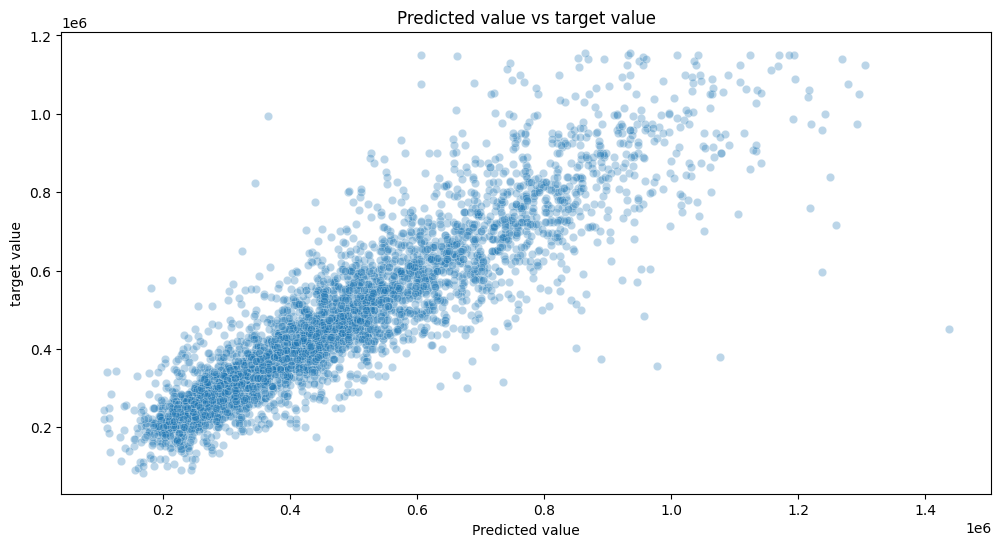

In [37]:
import seaborn as sns

predict = [i[0] for i in  model95.predict(x_test)]

data = pd.DataFrame({"predict": predict , "true_value" : y_test.price})

plt.figure(figsize=(12,6))
plt.title("Predicted value vs target value")
plt.ylabel("target value")
plt.xlabel("Predicted value")
sns.scatterplot(data = data , x="predict", y= "true_value", alpha=0.30)



In [38]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error , root_mean_squared_error  

print("MAE: ", mean_absolute_error(predict , y_test))
print("MAPE: ", mean_absolute_percentage_error(predict , y_test))
print("RMSE: ", root_mean_squared_error(predict , y_test))

MAE:  65967.06092114073
MAPE:  0.14311744919508246
RMSE:  96768.70049794603


## ANN regression .05

In [39]:
features= df[df.label == 1].loc[:, ~(df.columns.unique().isin(["price","label"]))]
target = df[df.label == 1].loc[:,["price"]]

In [40]:

x_train , x_test , y_train , y_test =train_test_split(features,target, test_size=0.2 , random_state=42)

scaler05=StandardScaler()

x_train= scaler05.fit_transform(x_train)
x_test= scaler05.transform(x_test)

In [41]:
tuner.search(x_train,y_train ,epochs=500,validation_data=(x_test,y_test) , callbacks=[stop_early])

In [42]:
#Best model
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.summary()

C:\Users\PC1\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 18)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 216)            │         4,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 189)            │        41,013 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 378)            │        71,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 423)            │       160,317 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 162)            │        68,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 243)            │        39,609 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 297)            │        72,468 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 198)            │        59,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 126)            │        25,074 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           127 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,224 (2.07 MB)

 Trainable params: 542,224 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
best_hps = tuner.get_best_hyperparameters(5)

model05 = build_model(best_hps[0])

model05.fit(x=x_train, y=y_train, validation_split=0.3 ,epochs=500)

Epoch 1/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 1604325.7500 - mean_absolute_error: 1604325.7500 - val_loss: 642267.1250 - val_mean_absolute_error: 642267.1250
Epoch 2/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 774040.4375 - mean_absolute_error: 774040.4375 - val_loss: 606370.4375 - val_mean_absolute_error: 606370.4375
Epoch 3/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 477012.3125 - mean_absolute_error: 477012.3125 - val_loss: 354269.5625 - val_mean_absolute_error: 354269.5625
Epoch 4/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 335716.9375 - mean_absolute_error: 335716.9375 - val_loss: 325189.5938 - val_mean_absolute_error: 325189.5938
Epoch 5/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 315657.6250 - mean_absolute_error: 315657.6250 - val_loss: 387408.2500 - val_mean_absolute_error: 387408.2500
Epoch 6/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 339397.5625 - mean_absolute_error: 339397.5625 - val_loss: 303127.3125 - val_mean_absolute_e

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


<Axes: title={'center': 'Predicted value vs target value'}, xlabel='Predicted value', ylabel='target value'>

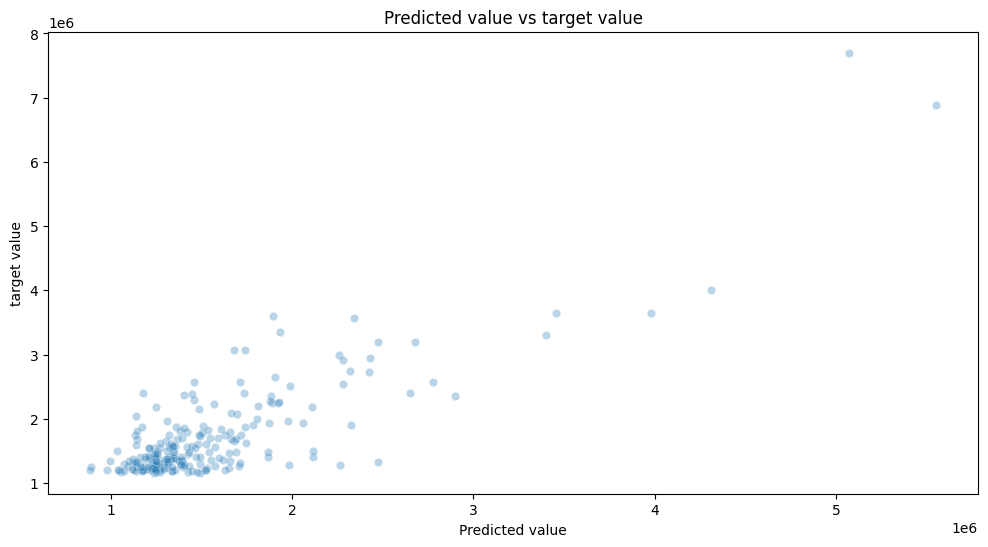

In [44]:
predict = [i[0] for i in  model05.predict(x_test)]

data = pd.DataFrame({"predict": predict , "true_value" : y_test.price})

plt.figure(figsize=(12,6))
plt.title("Predicted value vs target value")
plt.ylabel("target value")
plt.xlabel("Predicted value")
sns.scatterplot(data = data , x="predict", y= "true_value", alpha=0.30)



In [45]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error , root_mean_squared_error  

print("MAE: ", mean_absolute_error(predict , y_test))
print("MAPE: ", mean_absolute_percentage_error(predict , y_test))
print("RMSE: ", root_mean_squared_error(predict , y_test))

MAE:  303073.26987327187
MAPE:  0.1882879259314524
RMSE:  458908.4186139931


## Classifier --> Regression

### DataFrame labeling 

In [46]:
features = df.loc[:, ~(df.columns.unique().isin(["price","label"]))]
target = df.loc[:,["price"]]

In [47]:
scaler=StandardScaler()

features_s= scaler_clf.transform(features)


In [48]:

predicted = [i[0] for i in  model_clf.predict(features_s)]
prediction = [1 if x > 0.80 else 0 for x in predicted]

df["label"] = prediction


676/676 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


### Predict price 

In [49]:
features_0 = df[df.label == 0].loc[:, ~(df.columns.unique().isin(["price","label"]))]
target_0 = df[df.label == 0].loc[:,["price"]]
features_0 = scaler95.transform(features_0)


features_1 = df[df.label == 1].loc[:, ~(df.columns.unique().isin(["price","label"]))]
target_1 = df[df.label == 1].loc[:,["price"]]
features_1 = scaler05.transform(features_1)

643/643 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


<Axes: title={'center': 'Predicted value vs target value'}, xlabel='Predicted value', ylabel='target value'>

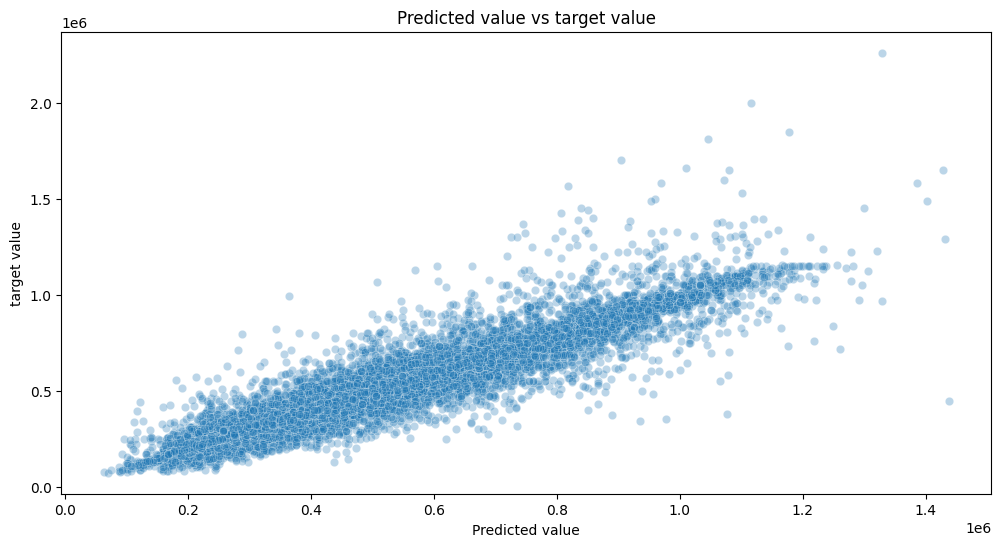

In [51]:
predicted = [i[0] for i in  model95.predict(features_0)]

data = pd.DataFrame({"predict": predicted , "true_value" : target_0.price})

plt.figure(figsize=(12,6))
plt.title("Predicted value vs target value")
plt.ylabel("target value")
plt.xlabel("Predicted value")
sns.scatterplot(data = data , x="predict", y= "true_value", alpha=0.30)

 

In [52]:
print("MAE: ", mean_absolute_error(predicted , target_0))
print("MAPE: ", mean_absolute_percentage_error(predicted , target_0))
print("RMSE: ", root_mean_squared_error(predicted , target_0))

MAE:  42503.68199954071
MAPE:  0.09253917253987413
RMSE:  72454.40221470839


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<Axes: title={'center': 'Predicted value vs target value'}, xlabel='Predicted value', ylabel='target value'>

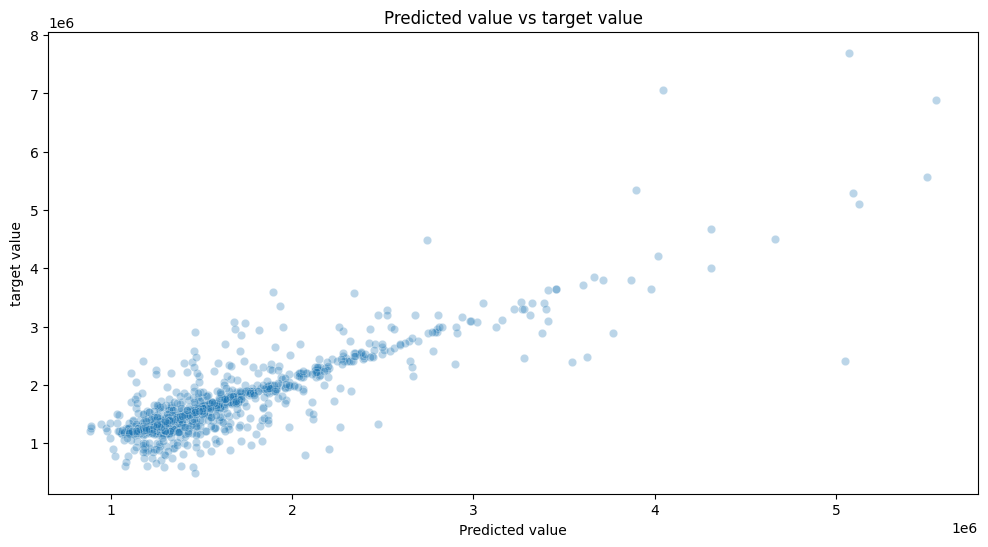

In [53]:
predicted = [i[0] for i in  model05.predict(features_1)]

data = pd.DataFrame({"predict": predicted , "true_value" : target_1.price})

plt.figure(figsize=(12,6))
plt.title("Predicted value vs target value")
plt.ylabel("target value")
plt.xlabel("Predicted value")
sns.scatterplot(data = data , x="predict", y= "true_value", alpha=0.30)

In [54]:
print("MAE: ", mean_absolute_error(predicted , target_1))
print("MAPE: ", mean_absolute_percentage_error(predicted , target_1))
print("RMSE: ", root_mean_squared_error(predicted , target_1))

MAE:  198023.983157277
MAPE:  0.12319025379957788
RMSE:  339525.5425219687
